In [1]:
import time
import os
import numpy as np
import random
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram

from quantuminspire.credentials import get_authentication
from quantuminspire.qiskit import QI

QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

In [2]:
authentication = get_authentication()
QI.set_authentication(authentication, QI_URL)

Enter email:
j.lizarraga@student.tudelft.nl
Enter password
········


In [3]:
def IntrinsicQuantumBB84Circuit(IsEve):
   
    """
    Circuit Generator
    
    For Starmon5 purposes only
    """
    q = QuantumRegister(6)
    ans = ClassicalRegister(6)
    qc = QuantumCircuit(q, ans)
    
    qc.h(q[0])
    qc.h(q[1])
    qc.h(q[3])
    

    
    qc.measure(q[0],ans[0])
    qc.measure(q[1],ans[1])
    qc.measure(q[3],ans[2])
    
    
    
    
    qc.cx(q[0],q[2])
    qc.ch(q[1],q[2])
    
    if IsEve:
        qc.h(q[5])
        qc.measure(q[5],ans[5])
        qc.swap(q[2],q[4])
        qc.ch(q[5],q[4])
        qc.measure(q[4],ans[4])
        qc.ch(q[5],q[4])
        qc.swap(q[4],q[2])

    qc.ch(q[3],q[2])
    qc.measure(q[2],ans[3])
    
    
    
    qc.draw()
    
    return q, qc

In [8]:
quantumResults, quantumCircuit = IntrinsicQuantumBB84Circuit(IsEve=True)
qi_backend = QI.get_backend('QX-34-L')


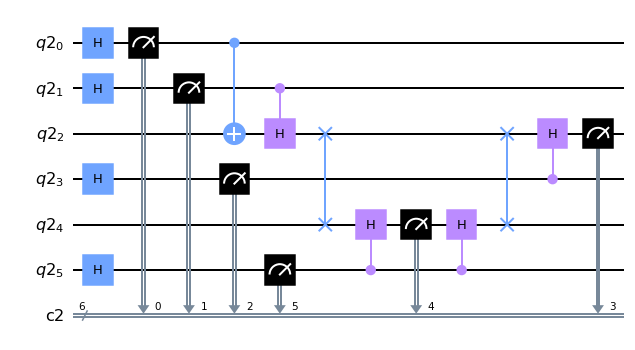

In [9]:
quantumCircuit.draw(output='mpl')

In [10]:
def BB84ProtocolQuantumRandom(messageLength):
    """
    Given the initial message length (int) it returns
    messageInABottle: randomly generated message to be communicated (A->B)
    AliceBasis: randomly generated Alice Basis (0:Z, 1:X)
    BobBasis: randomly generated Bob Basis (0:Z, 1:X)
    OutputString: either the result from the BB84 protocol if A&B have the same basis
    or an "x" if Basis(A) != Basis(B)! for each bit
    """
    
    
    n = 0
    messageInABottle = []
    AliceBasis = []
    BobBasis = []
    outputString = []
    sameBasisPositions = []
    

    job = execute(quantumCircuit, qi_backend,shots=messageLength,memory=True)
    result = job.result()
    counts = result.get_counts()
    measure = result.get_memory()
    n_register = len(measure[0])-1
    
    for n in range(messageLength):

        messageInABottle.append(int(measure[n][n_register-0]))
        AliceBasis.append(int(measure[n][n_register-1]))
        BobBasis.append(int(measure[n][n_register-2]))
        
        if AliceBasis[n] == BobBasis[n]:
            outputString.append(int(measure[n][n_register-3]))
            sameBasisPositions.append(n)
        else:
            outputString.append("x")
    

    return messageInABottle, AliceBasis, BobBasis, outputString, sameBasisPositions



In [11]:
prop = 0.5
tolerance = 0.8


def BB84KeyConstruction(message,output,goodIndices,prop,tolerance,explanation):
    """
    message: Alice starting message
    output: Bob's result through Quantum Magic
    goodIndices: bit Positions in which both basis are the same    
    prop: Proportion of common good bits to be compared
    tolerance: minimum success rate to generate a safe QK
    explanation: bool argument, if True, prints stuff

    """
    auxList = []    
    nGoodBits = len(goodIndices)
    
    
    nComparingBits = int(nGoodBits*prop)
    comparingBitPositions = random.sample(goodIndices, nComparingBits)
    if explanation:
        print("Bit Positions to compare: ",comparingBitPositions)
    
    allOkCounter = 0
    for i in range(nComparingBits):
        j = comparingBitPositions[i]
        if int(message[j])== int(output[j]):
            allOkCounter +=1
            
    for i in range(nGoodBits):
        if i not in comparingBitPositions:
            auxList.append(output[goodIndices[i]])
    
    #print(allOkCounter)
    if nComparingBits == 0:
        successRate = 1 
    else:
        successRate = float(allOkCounter/nComparingBits)
    
    if successRate < tolerance:
        if explanation:
            print("Success rate: ",successRate)
            print("Failure")
        return 0
    else:
        if explanation:
            print("Success rate: ",successRate)
            print("Success!!!")
            print("QKD: ", auxList)
        return auxList

In [12]:
messageLength = 4000

messageInABottle, AliceBasis, BobBasis, messageOutput, goodIndices = BB84ProtocolQuantumRandom(messageLength)

print("Message:        ", messageInABottle)
print("Alice Basis:    ", AliceBasis)
print("Bob Basis:      ", BobBasis)
print("Output Message: ", messageOutput)

QKD = BB84KeyConstruction(messageInABottle,messageOutput,goodIndices,prop,tolerance,explanation=True)


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


Message:         [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1

In [79]:
max_length = 100
keylength_array = np.zeros(max_length+1)
for messageLength in range(1,max_length+1):
    print("N bits:", messageLength)
    messageInABottle, AliceBasis, BobBasis, messageOutput, goodIndices = BB84ProtocolQuantumRandom(messageLength)
    QKD = BB84KeyConstruction(messageInABottle,messageOutput,goodIndices,prop,tolerance,explanation=False)
    keylength_array[messageLength]=len(QKD)



N bits: 1


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 2


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 3


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 4


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 5


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 6


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 7


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 8


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 9


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 10


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 11


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 12


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 13


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 14


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 15


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 16


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


N bits: 17


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


IndexError: list index out of range

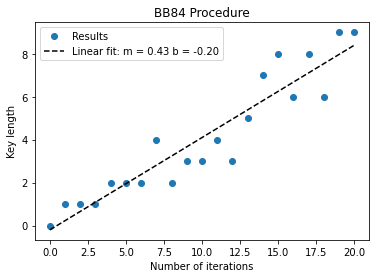

In [78]:
iter_array=np.zeros(len(keylength_array))
for i in range(len(iter_array)):
    iter_array[i] = i


m, b = np.polyfit(iter_array,keylength_array, 1)
string = "Linear fit: m = "+str('%.2f'%(m))+" b = "+str('%.2f'%(b))
plt.plot(keylength_array, "o",label="Results")
plt.plot(m*iter_array+b, '--k',label=string)
plt.xlabel("Number of iterations")
plt.ylabel("Key length")
plt.title("BB84 Procedure")
plt.legend()
plt.show()